In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import seaborn as sns

from astropy.table import Table

Populating the interactive namespace from numpy and matplotlib


In [2]:
deg_to_rad = 2. * np.pi / 360.

# My mean PMs within rh

In [3]:
df_kw = pd.read_csv('dwarf-csvs/dwarfs_pms.csv').drop(columns=['Unnamed: 0'])
df_kw.sample(2)

,GalaxyName,RA_deg,Dec_deg,Distance_pc,rh(arcmins),Nstar_rh,pmra_rh,pmdec_rh,Nstar_2rh,pmra_2rh,pmdec_2rh
25,HydraI,133.900000,3.600000,12700.000000,51.6,10781,-3.451374,-3.663730,42424,-3.399758,-3.604119
5,CanesVenatici(I),202.014583,33.555833,217770.977235,8.9,207,-3.595353,-5.486003,608,-4.404448,-5.980736


In [4]:
df_kw['dec_rad'] = df_kw['Dec_deg'] * deg_to_rad
df_kw['pmra_rh*cos(dec)'] = df_kw['pmra_rh'] * np.cos(df_kw['dec_rad'])
df_kw['pmra_2rh*cos(dec)'] = df_kw['pmra_2rh'] * np.cos(df_kw['dec_rad'])
df_kw.sample(2)

,GalaxyName,RA_deg,Dec_deg,Distance_pc,rh(arcmins),Nstar_rh,pmra_rh,pmdec_rh,Nstar_2rh,pmra_2rh,pmdec_2rh,dec_rad,pmra_rh*cos(dec),pmra_2rh*cos(dec)
39,Reticulum2,53.925417,-54.049167,30199.517204,3.64,43,5.868192,-0.490327,121,5.308503,-0.484064,-0.943336,3.445161,3.116573
26,HydraII,185.425417,-31.985278,134276.496114,1.70,30,-6.943877,0.203504,88,-6.565908,-1.042752,-0.558248,-5.889687,-5.569100


# PMs from Table 3 in Pace et al 2019
Table data was downloaded from arxiv with source

In [5]:
t = Table.read('pm-data/Pace2019_table_PM.tex')
for col in t.colnames:
    print(col)

\colhead{Satellite}
\colhead{$\sum p_i$}
\colhead{${\rm N}$($p_i > 0.1$)}
\colhead{${\rm N}_{\rm expected}$}
\colhead{${\rm N}(r<3\times r_h)$}
\colhead{$\overline{\mu_{\alpha }\cos{\delta}}$}
\colhead{$\overline{\mu_{\delta}}$ }
\colhead{$C_{\overline{\pmra} \times \overline{\pmdec}}$ }


In [6]:
newcol = ['satellite', 
          'prob_membership',
          'Nstar_(prob>0.1)',
          'Nexpected',
          'N(r<3rh)',
          'pmra*cos(dec)',
          'pmdec',
          'correlation',
         ]

for i,col in enumerate(t.colnames):
    print('%20s    <-    %s' % (newcol[i], col))

           satellite    <-    \colhead{Satellite}
     prob_membership    <-    \colhead{$\sum p_i$}
    Nstar_(prob>0.1)    <-    \colhead{${\rm N}$($p_i > 0.1$)}
           Nexpected    <-    \colhead{${\rm N}_{\rm expected}$}
            N(r<3rh)    <-    \colhead{${\rm N}(r<3\times r_h)$}
       pmra*cos(dec)    <-    \colhead{$\overline{\mu_{\alpha }\cos{\delta}}$}
               pmdec    <-    \colhead{$\overline{\mu_{\delta}}$ }
         correlation    <-    \colhead{$C_{\overline{\pmra} \times \overline{\pmdec}}$ }


In [7]:
df_pace = t.to_pandas()
df_pace = df_pace.rename(columns={col: newcol[i] for i,col in enumerate(t.colnames)})
df_pace.sample(2)

,satellite,prob_membership,Nstar_(prob>0.1),Nexpected,N(r<3rh),pmra*cos(dec),pmdec,correlation
7,Eridanus III,5.14,6,$4 \pm 2$,4,$1.06_{-0.24}^{+0.24}$,$-0.48_{-0.24}^{+0.24}$,-0.12
9,Phoenix II,8.78,10,$9 \pm 3$,9,$0.49_{-0.10}^{+0.11}$,$-1.03_{-0.12}^{+0.12}$,-0.48


In [8]:
df_pace['mean_pmra*cos(dec)'] = df_pace['pmra*cos(dec)'].str.split('_', n=1, expand=True)[0]
df_pace['mean_pmra*cos(dec)'] = df_pace['mean_pmra*cos(dec)'].str.replace('$', '').astype(float)

df_pace['mean_pmdec'] = df_pace['pmdec'].str.split('_', n=1, expand=True)[0]
df_pace['mean_pmdec'] = df_pace['mean_pmdec'].str.replace('$', '').astype(float)

df_pace.sample(2)

,satellite,prob_membership,Nstar_(prob>0.1),Nexpected,N(r<3rh),pmra*cos(dec),pmdec,correlation,mean_pmra*cos(dec),mean_pmdec
8,Grus II,31.49,58,$39 \pm 7$,68,$0.43_{-0.08}^{+0.09}$,$-1.45_{-0.15}^{+0.11}$,0.24,0.43,-1.45
3,Reticulum II,48.08,67,$43 \pm 6$,64,$2.36_{-0.05}^{+0.05}$,$-1.32_{-0.06}^{+0.06}$,0.18,2.36,-1.32


# Comparison

In [9]:
df_kw['GalaxyName'] = df_kw['GalaxyName'].str.replace('(', '')
df_kw['GalaxyName'] = df_kw['GalaxyName'].str.replace(')', '')
df_kw['GalaxyName'] = df_kw['GalaxyName'].str.replace('1', 'I')
df_kw['GalaxyName'] = df_kw['GalaxyName'].str.replace('2', 'II')
df_kw['GalaxyName'] = df_kw['GalaxyName'].str.replace('3', 'III')

df_pace['satellite'] = df_pace['satellite'].str.replace(' ', '')

df_merged = pd.merge(df_kw, df_pace, left_on=['GalaxyName'], right_on=['satellite'], how='inner')
df_merged

,GalaxyName,RA_deg,Dec_deg,Distance_pc,rh(arcmins),Nstar_rh,pmra_rh,pmdec_rh,Nstar_2rh,pmra_2rh,...,satellite,prob_membership,Nstar_(prob>0.1),Nexpected,N(r<3rh),pmra*cos(dec),pmdec,correlation,mean_pmra*cos(dec),mean_pmdec
0,ColumbaI,82.860000,-28.030000,181970.085861,1.90,19,1.453296,-1.071868,59,2.277334,...,ColumbaI,7.19,11,$6 \pm 3$,8,$-0.02_{-0.27}^{+0.24}$,$-0.04_{-0.30}^{+0.30}$,-0.22,-0.02,-0.04
1,EridanusII,56.087917,-43.533333,380189.396321,1.53,9,0.693537,-2.139925,33,3.879216,...,EridanusII,18.44,21,$20 \pm 5$,16,$0.16_{-0.24}^{+0.24}$,$0.15_{-0.26}^{+0.26}$,-0.27,0.16,0.15
2,EridanusIII,35.689583,-52.283611,87096.358996,0.54,3,15.555584,-1.405098,5,10.026216,...,EridanusIII,5.14,6,$4 \pm 2$,4,$1.06_{-0.24}^{+0.24}$,$-0.48_{-0.24}^{+0.24}$,-0.12,1.06,-0.48
3,GrusI,344.176667,-50.163333,120226.443462,1.77,11,11.791457,-5.669604,37,4.353178,...,GrusI,8.23,9,$8 \pm 3$,8,$-0.25_{-0.16}^{+0.16}$,$-0.47_{-0.23}^{+0.23}$,0.35,-0.25,-0.47
4,GrusII,331.020000,-46.440000,52966.344389,6.00,115,4.040235,-8.673087,427,4.127110,...,GrusII,31.49,58,$39 \pm 7$,68,$0.43_{-0.08}^{+0.09}$,$-1.45_{-0.15}^{+0.11}$,0.24,0.43,-1.45
5,HorologiumI,43.882083,-54.118889,79432.823472,1.31,7,5.815692,0.161531,18,7.321546,...,HorologiumI,17.06,20,$16 \pm 4$,15,$0.95_{-0.07}^{+0.07}$,$-0.55_{-0.06}^{+0.06}$,0.29,0.95,-0.55
6,HorologiumII,49.133750,-50.018056,77983.011052,2.09,12,3.386036,-5.078660,32,5.791953,...,HorologiumII,4.13,5,$8 \pm 3$,5,$0.82_{-0.40}^{+0.45}$,$-0.04_{-0.71}^{+0.62}$,0.07,0.82,-0.04
7,PhoenixII,354.997500,-54.406111,83176.377110,1.09,8,9.576451,-9.484237,21,7.182361,...,PhoenixII,8.78,10,$9 \pm 3$,9,$0.49_{-0.10}^{+0.11}$,$-1.03_{-0.12}^{+0.12}$,-0.48,0.49,-1.03
8,ReticulumII,53.925417,-54.049167,30199.517204,3.64,43,5.868192,-0.490327,121,5.308503,...,ReticulumII,48.08,67,$43 \pm 6$,64,$2.36_{-0.05}^{+0.05}$,$-1.32_{-0.06}^{+0.06}$,0.18,2.36,-1.32
9,ReticulumIII,56.360000,-60.450000,91622.049012,2.40,11,4.289628,3.952851,42,5.814544,...,ReticulumIII,5.78,7,$12 \pm 4$,8,$-1.02_{-0.30}^{+0.32}$,$-1.23_{-0.36}^{+0.40}$,0.39,-1.02,-1.23


Text(0, 0.5, 'pmdec [mas/yr]')

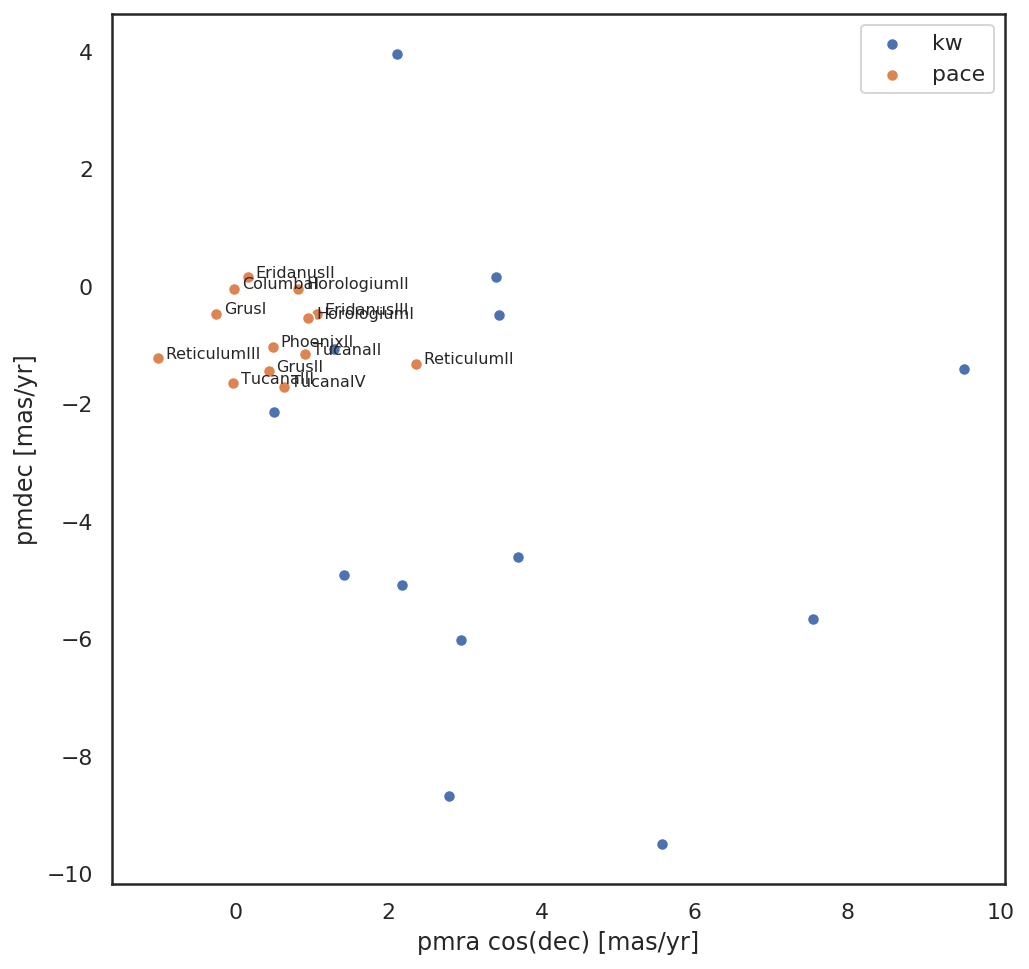

In [12]:
sns.set(style="white", color_codes=True, font_scale=1)
fig, ax = plt.subplots(figsize=(8, 8))

p1 = sns.scatterplot(data=df_merged, x='pmra_rh*cos(dec)', y='pmdec_rh', ax=ax, label='kw')
# sns.scatterplot(x=df_merged['pmra_2rh*cos(dec)'], y=df_merged['pmdec_2rh'], ax=ax)
p2 = sns.scatterplot(data=df_merged, x='mean_pmra*cos(dec)', y='mean_pmdec', ax=ax, label='pace')

# sns.regplot(data=df_merged, x='pmra_rh*cos(dec)', y='pmdec_rh', 
#             fit_reg=False, marker="+", color="skyblue")
for i in range(df_merged.shape[0]):
#     p1.text(df_merged['pmra_rh*cos(dec)'][i] + 0.1, df_merged['pmdec_rh'][i], 
#             df_merged['GalaxyName'][i], horizontalalignment='left', size=8)
    p2.text(df_merged['mean_pmra*cos(dec)'][i] + 0.1, df_merged['mean_pmdec'][i], 
            df_merged['satellite'][i], horizontalalignment='left', size=8)

# fig.autofmt_xdate()
ax.set_xlabel('pmra cos(dec) [mas/yr]')
ax.set_ylabel('pmdec [mas/yr]')
# ax.set_title('significance in overlapping area')

# plt.savefig('sig_overlap.png', bbox_inches='tight', dpi=300)